# KHOA HỌC WEB - PROJECT 3

### PHÂN TÍCH DỮ LIỆU WEB
#### Nội dung: Áp dụng một vài mô hình máy học để phân tích dữ liệu thu thập từ project 1 và đã xử lý ở project 2

#### *Thành viên nhóm*
- 20424027 - Phạm Thị Minh Hậu
- 20424056 - Nguyễn Thế Ngọc
- 20424058 - Nguyễn Văn Nhật

#### *Data nhóm dùng trong procject này sẽ từ data Project 2 đã qua xử lý*

In [187]:
# import các thư viện cần dùng
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import json

In [76]:
# Các hàm hỗ trợ
def read_json(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        file_data = json.load(file)
        return file_data

### Những điều nhóm rút ra từ project 2 với data của nhóm và đặt vấn đề
- 1/ % giảm giá và số bán được từ project 2 có tương quan nghịch, nhóm muốn dự đoán 1 sản phẩm giảm X % thì bán được tốt không
- 2/ % giảm giá và điểm đánh giá sản phẩm từ project 2 có tương quan thuận, nhóm muốn dự đoán rằng giảm X% thì liệu đánh giá có tốt (bỏ qua các môi trường ngoài lề như ship...)
- 3/ Điểm đánh giá và số bán được có tương quan thuận, nhóm muốn dự đoán rằng với số điểm đánh giá X thì số bán có cao theo hay không
- 4/ Dựa vào đánh giá và số lượng bán được, dự đoán xem đó có phải shop mall hay không
- 5/ Ngoài ra, nhóm sẽ cố dự đoán thử sản phẩm đó thuộc tiki hay shopee, dựa vào điểm đánh giá và số bán được, để đánh giá xem nền tảng nào bán có chất lượng trung bình ổn hơn.

### Hướng giải quyết nhóm đề ra, áp dụng mô hình máy học gì?
- 1/ Nhóm sử dụng Mô hình tuyến tính (Linear Regression) để giải quyết bài toán này.
- 2/ Nhóm sử dụng Mô hình tuyến tính (Linear Regression) để giải quyết bài toán này.
- 3/ Nhóm sử dụng Mô hình tuyến tính để giải quyết bài toán này.
- 4/ Nhóm sử dụng mô hình Mạng nơ ron để giải quyết bài toán này.
- 5/ Nhóm sử dụng vài mô hình cổ điển như bayes hoặc K-nn hoặc Kmean để giải quyết bài toán này.

### Kết luận trả lời câu hỏi ban đầu đặt ra sẽ nằm ở cuối file này.
# Phần code
#### Chuẩn bị data

In [123]:
# load data sẵn mà ta cần dùng để mô phỏng
all_data = read_json("filtered/data.json")["data"]

point_data = np.array([item["point"] for item in all_data])
sold_data = np.array([item["sold_count"] for item in all_data])
discount_data = np.array([item["discount_percent"] for item in all_data])
platform_data = np.array([item["platform"] for item in all_data])
mall_data = []
for item in all_data:
    if item["mall"]:
        mall_data.append(1)
    else:
        mall_data.append(0)
        
mall_data = np.array(mall_data)

### Bài toán số 1: %giảm giá  X  số bán được, dự đoán số bán

số phần tử để test: 327
Coefficients:  [-9.89280712]
intercept: 2378.570057905246
Mean squared error: 27898493.53
Coefficient of determination: -0.02
score: 0.00039085226634727466


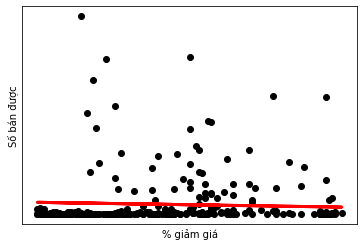

In [86]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 1: x là % giảm giá, y là số bán được
# luôn lấy 20% đuôi làm test
x, y = discount_data.copy(), sold_data.copy()
tail = len(x)*20//100
x = x.reshape(-1,1)
print("số phần tử để test:", tail)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]

# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)
print("intercept:", regr.intercept_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

#score
print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("% giảm giá")
plt.ylabel("Số bán được")

plt.show();

### Nhận xét
- ta thấy rằng có rất nhiều sản phẩm bán <300 và % giảm giá quá ít ảnh hưởng rất mạnh tới dự đoán, nhưng data này chúng nó lại rất nhiều.
- ta sẽ thử loại bỏ các điểm có số bán < 300 HOẶC %giảm giá < 20 rồi phỏng đoán lại

số phần tử để test: 87
Coefficients:  [-25.34058483]
Mean squared error: 48091013.91
Coefficient of determination: -0.01
score: 0.0005816299996145302


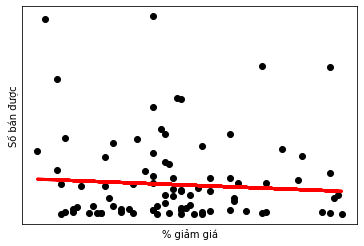

In [87]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 1: x là % giảm giá, y là số bán được
x, y = discount_data.copy(), sold_data.copy()
new_x, new_y = [],[]
for i in range(len(x)):
    if x[i] > 20 and y[i] > 300:
        new_x.append(x[i])
        new_y.append(y[i])
x = np.array(new_x)
y = np.array(new_y)

tail = len(x)*20//100
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("% giảm giá")
plt.ylabel("Số bán được")

plt.show();

### Nhận xét
- ta thấy rõ ràng hơn là chúng tương quan nghịch tuy nhiên còn một vài outlier quá cao, ta sẽ loại bỏ rồi phân tích tiếp.
- ta sẽ sử dụng phương pháp Zscore để loại bỏ outlier (bài tự tìm hiểu môn khai thác)
- ta sẽ thử lấy data từ trên làm tiếp, loại bỏ outlier rồi phân tích.

số phần tử để test: 84
Coefficients:  [17.98332986]
Mean squared error: 75407150.77
Coefficient of determination: -0.11
score: 0.0018726465008461757


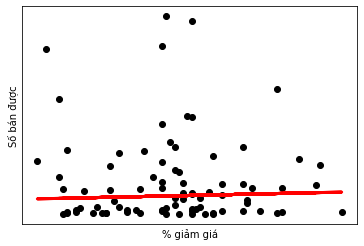

In [88]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 1: x là % giảm giá, y là số bán được
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

threshold = 3

# ta sẽ tính Z score xem có vi phạm threshold không trog lúc lọc

new_x, new_y = [],[]
for i in range(len(x)):
    zscore_x = (x[i] - x_mean)/x_std
    zscore_y = (y[i] - y_mean)/y_std
    if zscore_x <= threshold and zscore_y <= threshold:
        new_x.append(x[i])
        new_y.append(y[i])
x = np.array(new_x)
y = np.array(new_y)

tail = len(x)*20//100 #20%
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("% giảm giá")
plt.ylabel("Số bán được")

plt.show();

#### Nhận xét:
- Sau khi loại bỏ Outlier từ data mà đã loại bớt các sản phẩm có số bán ít, ta đã được đường outlier giữa %giảm và số bán khá tương quan thuận, đúng với cái mà ta cần tìm ban đầu. Coefficients cũng còn 17, thay vì âm như 2 trường hợp trên.

### Bài toán số 2: %giảm giá và điểm đánh giá, dự đoán điểm đánh giá
- rút kinh nghiệm từ bài 1, bài 2 ta sẽ làm theo gốc và làm theo loại outlier trước từ data gốc rồi phân tích

số phần tử để test: 327
Coefficients:  [-0.00130921]
Mean squared error: 0.25
Coefficient of determination: -0.05
score: 0.00425668878911678


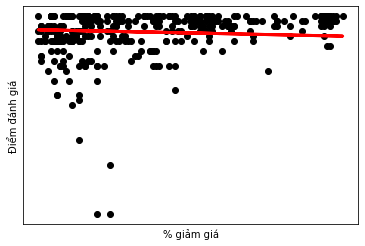

In [184]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 2: x là % giảm giá, y là điểm đánh giá
x, y = discount_data.copy(), point_data.copy()
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

threshold = 3

# ta sẽ tính Z score xem có vi phạm threshold không trog lúc lọc

new_x, new_y = [],[]
for i in range(len(x)):
    zscore_x = (x[i] - x_mean)/x_std
    zscore_y = (y[i] - y_mean)/y_std
    if zscore_x <= threshold and zscore_y <= threshold:
        new_x.append(x[i])
        new_y.append(y[i])
x = np.array(new_x)
y = np.array(new_y)

tail = len(x)*20//100
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("% giảm giá")
plt.ylabel("Điểm đánh giá")

plt.show();

##### Thử không loại bỏ outlier

số phần tử để test: 327
Coefficients:  [-0.00130921]
Mean squared error: 0.25
Coefficient of determination: -0.05
score: 0.004256688789116891


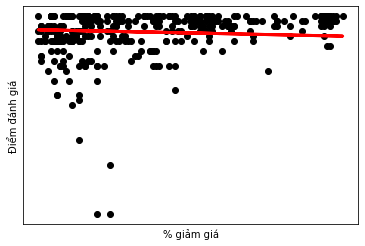

In [183]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 2: x là % giảm giá, y là điểm đánh giá
x, y = discount_data.copy(), point_data.copy()

tail = len(x)*20//100
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("% giảm giá")
plt.ylabel("Điểm đánh giá")

plt.show();

#### Nhận xét
- khi loại bỏ outlier hay không, ta cũng không thể phũ nhận được rằng chúng tương quan nghịch (xét ở data của nhóm thu thập)
- so với thực tế, có lẻ tạm coi chưa trả lời được câu hỏi đặt ra, so với bài 1 thì ta trả lời được
- Mean squared error cho ra thấp hơn so với bài 1

### Bài toán số 3: Điểm đánh giá và số bán ra, dự đoán số bán ra

#### linear, không loại bỏ outlier

số phần tử để test: 327
Coefficients:  [2114.15369377]
Mean squared error: 26536265.76
Coefficient of determination: 0.03
score: 0.007187753276994724


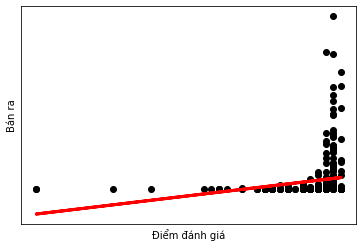

In [185]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 3: x là điểm dánh giá, y là số bán ra
x, y = point_data.copy(), sold_data.copy()

tail = len(x)*20//100
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("Điểm đánh giá")
plt.ylabel("Bán ra")

plt.show();

### linear, loại bỏ outlier

số phần tử để test: 33
Coefficients:  [0.13365839]
Mean squared error: 3.32
Coefficient of determination: -0.03
score: 0.004751233883811268


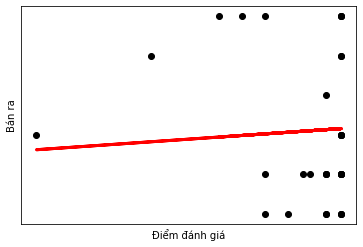

In [186]:
# lấy data cần train, phỏng đoán
# y là cái ta cần phỏng đoán
# bài 3: x là điểm dánh giá, y là số bán ra
x, y = point_data.copy(), sold_data.copy()

threshold = 3

# ta sẽ tính Z score xem có vi phạm threshold không trog lúc lọc

new_x, new_y = [],[]
for i in range(len(x)):
    zscore_x = (x[i] - x_mean)/x_std
    zscore_y = (y[i] - y_mean)/y_std
    if zscore_x <= threshold and zscore_y <= threshold:
        new_x.append(x[i])
        new_y.append(y[i])
x = np.array(new_x)
y = np.array(new_y)

tail = len(x)*20//100
print("số phần tử để test:", tail)
x = x.reshape(-1,1)

# tách data ra thành phần train và phần kiểm tra
# lấy tail phần tử cuối cho test, còn lại là train
x_train = x[:-tail]
x_test = x[-tail:]

y_train = y[:-tail]
y_test = y[-tail:]


# sử dụng modal linear regression từ thư viện sklearn
regr = linear_model.LinearRegression()

# cho học dữ liệu train đã định sẵn
regr.fit(x_train, y_train)

# cho phỏng đoán tử từ tập data đã tách ra từ đầu dựa vào X, ta sẽ phỏng đoán Y
y_predict = regr.predict(x_test)

# các hệ số
# coefficients
print("Coefficients: ", regr.coef_)

# tính mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))

# Coefficient of determination
print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

print("score:", regr.score(x_train,y_train))

# mô phỏng linear lên bằng matplotlib.pyplot
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_predict, color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("Điểm đánh giá")
plt.ylabel("Bán ra")

plt.show();

#### Nhận xét
- Khi thử với mô hình Linear, dù loại bỏ outlier hay không, ta nhận xét rằng 2 data này có tương quan thuận với nhau.
- đáp ứng được bài toán ban đầu ta đặt ra và mong đợi.

### Bài toán số 4: Dựa vào đánh giá và số lượng bán được, dự đoán xem đó có phải shop mall hay không

In [171]:
x = []
for i in range(len(point_data)):
    x.append([point_data[i], sold_data[i]])
y = mall_data.copy()

In [172]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

# 2 tầng ,mỗi tầng ảnh 3 noron, hàm giải là tanh, bộ tối ưu sử dụng lbfgs, số vòng lập tối đa là 100000
neural_net_model = MLPClassifier(hidden_layer_sizes=(3,3,), activation="tanh", solver="lbfgs", max_iter=100000, random_state=0)

#train
neural_net_model.fit(train_x, train_y)

# độ lỗi trên train
print("độ lỗi tập train, 2 lớp 3 noron")
print(np.mean(train_y != neural_net_model.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi tập test, 2 lớp 3 noron")
np.mean(test_y != neural_net_model.predict(test_x))

độ lỗi tập train, 2 lớp 3 noron
0.4251908396946565
độ lỗi tập test, 2 lớp 3 noron


0.43597560975609756

In [173]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

# 2 tầng ,mỗi tầng ảnh 9 noron, hàm giải là tanh, bộ tối ưu sử dụng lbfgs, số vòng lập là 1000
neural_net_model = MLPClassifier(hidden_layer_sizes=(9,9), activation="tanh", solver="lbfgs", max_iter=10000, random_state=0)

#train
neural_net_model.fit(train_x, train_y)

# độ lỗi trên train
print("độ lỗi train, 2 lớp 9 noron")
print(np.mean(train_y != neural_net_model.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test, 2 lớp 9 noron")
np.mean(test_y != neural_net_model.predict(test_x))

độ lỗi train, 2 lớp 9 noron
0.4068702290076336
độ lỗi test, 2 lớp 9 noron


0.42378048780487804

In [174]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

# hàm giải là tanh, bộ tối ưu sử dụng lbfgs, số vòng lập là 10000
neural_net_model = MLPClassifier(hidden_layer_sizes=(6,6,6,), activation="tanh", solver="lbfgs", max_iter=10000, random_state=0)

#train
neural_net_model.fit(train_x, train_y)

# độ lỗi trên train
print("độ lỗi train, 3 lớp 6 noron")
print(np.mean(train_y != neural_net_model.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test, 3 lớp 6 noron")
np.mean(test_y != neural_net_model.predict(test_x))

độ lỗi train, 3 lớp 6 noron
0.41908396946564885
độ lỗi test, 3 lớp 6 noron


0.4176829268292683

In [175]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

# hàm giải là tanh, bộ tối ưu sử dụng lbfgs, số vòng lập là 10000
neural_net_model = MLPClassifier(hidden_layer_sizes=(9,9,9,), activation="tanh", solver="lbfgs", max_iter=10000, random_state=0)

#train
neural_net_model.fit(train_x, train_y)

# độ lỗi trên train
print("độ lỗi train, 3 lớp 9 noron")
print(np.mean(train_y != neural_net_model.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test, 3 lớp 9 noron")
np.mean(test_y != neural_net_model.predict(test_x))

độ lỗi train, 3 lớp 9 noron
0.4198473282442748
độ lỗi test, 3 lớp 9 noron


0.4146341463414634

In [176]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

# hàm giải là tanh, bộ tối ưu sử dụng lbfgs, số vòng lập là 10000
neural_net_model = MLPClassifier(hidden_layer_sizes=(6,6,6,6,), activation="tanh", solver="lbfgs", max_iter=10000, random_state=0)

#train
neural_net_model.fit(train_x, train_y)

# độ lỗi trên train
print("độ lỗi train, 4 lớp 6 noron")
print(np.mean(train_y != neural_net_model.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test, 4 lớp 6 noron")
np.mean(test_y != neural_net_model.predict(test_x))

độ lỗi train, 4 lớp 6 noron
0.38625954198473283
độ lỗi test, 4 lớp 6 noron


0.4268292682926829

### Bài toán số 5: Sử dụng Knn, dựa vào điểm đánh giá và số bán được, dự đoán nền tảng shopee hoặc tiki

In [177]:
# x sẽ dùng data được tạo ở đầu bài neural
y = platform_data.copy()
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)

print("KNN với k = 3")
# độ lỗi trên train
print("độ lỗi train")
print(np.mean(train_y != neigh.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test")
np.mean(test_y != neigh.predict(test_x))

độ lỗi train
0.15725190839694655
độ lỗi test


0.3079268292682927

In [179]:

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(train_x, train_y)

print("KNN với k = 7")
# độ lỗi trên train
print("độ lỗi train")
print(np.mean(train_y != neigh.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test")
np.mean(test_y != neigh.predict(test_x))

KNN với k = 7
độ lỗi train
0.22595419847328244
độ lỗi test


0.2682926829268293

In [181]:

neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(train_x, train_y)

print("KNN với k = 15")
# độ lỗi trên train
print("độ lỗi train")
print(np.mean(train_y != neigh.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test")
np.mean(test_y != neigh.predict(test_x))

KNN với k = 15
độ lỗi train
0.25190839694656486
độ lỗi test


0.24085365853658536

In [182]:

neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(train_x, train_y)

print("KNN với k = 21")
# độ lỗi trên train
print("độ lỗi train")
print(np.mean(train_y != neigh.predict(train_x)))

# độ lỗi ngoài tập huấn luyện
print("độ lỗi test")
np.mean(test_y != neigh.predict(test_x))

KNN với k = 21
độ lỗi train
0.2587786259541985
độ lỗi test


0.24390243902439024